In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_transportation_dataset(num_sources, num_destinations):
    # Generate random sources and destinations
    sources = list(range(num_sources))
    destinations = list(range(num_destinations))

    # Generate random distances for the transportation problem
    distance = np.random.randint(1, 10, size=(num_sources, num_destinations))

    return sources, destinations, distance

In [4]:
def evaluate_solution(solution, sources, destinations, distance):
    total_distance = 0
    for source, destination_index in enumerate(solution):
        destination = destinations[destination_index]
        total_distance += distance[source][destination]
    return -total_distance

In [5]:
# Define the Q-learning algorithm
def q_learning(sources, destinations, distance):
    # Q-learning implementation
    
    # Q-learning parameters
    learning_rate = 0.1
    discount_factor = 0.9
    exploration_rate = 0.1

    # Initialize the Q-table
    num_states = len(sources)
    num_actions = len(destinations)
    q_table = np.zeros((num_states, num_actions))

    # Q-learning algorithm
    
    # Run episodes
    for _ in range(1000):  # You can adjust the number of episodes here
        state = np.random.randint(num_states)  # Random initial state

        # Explore or exploit
        if np.random.rand() < exploration_rate:
            action = np.random.randint(num_actions)  # Random action
        else:
            action = np.argmax(q_table[state])  # Greedy action

        # Update Q-value using the Q-learning equation
        next_state = np.random.choice(destinations)  # Random next state
        reward = -distance[sources[state]][destinations[action]]  # Negative distance as reward
        next_action = np.argmax(q_table[next_state])  # Greedy action for next state
        q_table[state, action] += learning_rate * (reward + discount_factor * q_table[next_state, next_action] - q_table[state, action])

#     # Run the Q-learning algorithm
#     q_learning()

    # Find the best solution after the algorithm execution
    best_solution = np.argmax(q_table, axis=1)
    total_distance = -np.sum([distance[sources[i]][destinations[best_solution[i]]] for i in range(num_states)])


    # Return the best solution and its total distance
    return best_solution, total_distance

In [6]:
# Define the Firefly Algorithm
def firefly_algorithm(sources, destinations, distance):

    # Firefly algorithm parameters
    num_fireflies = 20
    max_iterations = 200
    beta0 = 1  # Initial attractiveness parameter
    alpha = 0.2  # Attraction coefficient
    gamma = 0.1  # Randomization coefficient

    # Initialize fireflies randomly
    fireflies = np.random.randint(0, num_destinations, size=(num_fireflies, num_sources))

    # Firefly algorithm implementation
 
    for iteration in range(max_iterations):
        for i in range(num_fireflies):
            current_firefly = fireflies[i]
            current_fitness = evaluate_solution(current_firefly, sources, destinations, distance)

            for j in range(num_fireflies):
                if i == j:
                    continue

                other_firefly = fireflies[j]
                other_fitness = evaluate_solution(other_firefly, sources, destinations, distance)

                # Compute attractiveness
                distance_squared = np.sum((current_firefly - other_firefly) ** 2)
                attractiveness = beta0 * np.exp(-alpha * distance_squared)

                # Update the firefly position based on attractiveness
                if other_fitness > current_fitness or (other_fitness == current_fitness and np.random.uniform() < gamma):
                    fireflies[i] = current_firefly + attractiveness * (other_firefly - current_firefly)

        # Ensure the firefly stays within the valid range of destinations
        fireflies = np.clip(fireflies, 0, num_destinations - 1)

    # Main algorithm
    best_fireflies = (fireflies)

    # Find the best solution after the algorithm execution
    best_solution = best_fireflies[np.argmax([evaluate_solution(solution, sources, destinations, distance) for solution in best_fireflies])]

    # Compute the total distance of the best solution
    total_distance = evaluate_solution(best_solution, sources, destinations, distance)

    # Return the best solution and its total distance
    return best_solution, total_distance



In [7]:

# Define the Ant Colony Optimization
def ant_colony_optimization(sources, destinations, distance):
    
    # ACO algorithm parameters
    num_ants = 10
    num_iterations = 200
    pheromone_factor = 1.0
    heuristic_factor = 1.0
    evaporation_rate = 0.1

    # Initialize the pheromone matrix
    pheromone = np.ones((num_sources, num_destinations))

    # Initialize the best solution and its distance
    best_solution = None
    best_distance = float('inf')

    # ACO algorithm implementation
    for iteration in range(num_iterations):
        # Initialize ant solutions and distances
        ant_solutions = []
        ant_distances = []

        for ant in range(num_ants):
            # Initialize the ant solution
            ant_solution = []

            # Construct the ant solution
            for source in sources:
                # Compute the selection probabilities based on pheromone and heuristic information
                selection_scores = pheromone[source] ** pheromone_factor * (1.0 / distance[source]) ** heuristic_factor

                # Apply softmax function to convert scores into probabilities
                selection_probabilities = np.exp(selection_scores) / np.sum(np.exp(selection_scores))

                # Apply roulette wheel selection to choose the destination
                destination = np.random.choice(destinations, p=selection_probabilities)
                ant_solution.append(destination)

            # Evaluate the ant solution
            ant_distance = evaluate_solution(ant_solution, sources, destinations, distance)

            # Update the best solution if necessary
            if ant_distance < best_distance:
                best_solution = ant_solution
                best_distance = ant_distance

            # Store the ant solution and its distance
            ant_solutions.append(ant_solution)
            ant_distances.append(ant_distance)

        # Update the pheromone matrix based on the ant solutions
        delta_pheromone = np.zeros_like(pheromone)
        for ant_solution, ant_distance in zip(ant_solutions, ant_distances):
            for source, destination_index in enumerate(ant_solution):
                delta_pheromone[source][destinations[destination_index]] += 1.0 / ant_distance

        # Evaporate the pheromone
        pheromone = (1.0 - evaporation_rate) * pheromone + delta_pheromone

    # Compute the total distance of the best solution
    total_distance = evaluate_solution(best_solution, sources, destinations, distance)

    # Return the best solution and its total distance
    return best_solution, total_distance



In [8]:
def particle_swarm_optimization(sources, destinations, distance):
    # PSO algorithm parameters
    num_particles = 20
    max_iterations = 200
    inertia_weight = 0.7
    cognitive_weight = 1.4
    social_weight = 1.4

    # Initialize the particles and their velocities
    particles = np.random.randint(0, num_destinations, size=(num_particles, num_sources))
    velocities = np.zeros_like(particles)

    # Initialize the best solution and its distance
    best_solution = None
    best_distance = float('inf')

    # PSO algorithm implementation
    for iteration in range(max_iterations):
        for i in range(num_particles):
            particle = particles[i]

            # Evaluate the current particle solution
            particle_distance = evaluate_solution(particle, sources, destinations, distance)

            # Update the best solution if necessary
            if particle_distance < best_distance:
                best_solution = particle
                best_distance = particle_distance

            # Update the velocity and position of the particle
            velocity = velocities[i]

            # Update the velocity using the PSO equations
            new_velocity = (inertia_weight * velocity +
                            cognitive_weight * np.random.random() * (particle - particles[i]) +
                            social_weight * np.random.random() * (best_solution - particle))

            # Update the position (solution) based on the velocity
            new_particle = np.clip(particle + new_velocity, 0, num_destinations - 1)

            # Update the particle and velocity
            particles[i] = new_particle
            velocities[i] = new_velocity

    # Compute the total distance of the best solution
    total_distance = evaluate_solution(best_solution, sources, destinations, distance)
    
    return best_solution, total_distance

In [9]:
# Define the Genetic Algorithm
def create_initial_population(population_size, num_sources, num_destinations):
    return np.random.randint(0, num_destinations, size=(population_size, num_sources))

def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

def mutate(solution, num_destinations):
    mutation_rate = 0.1
    mutated_solution = solution.copy()
    for i in range(len(mutated_solution)):
        if np.random.random() < mutation_rate:
            mutated_solution[i] = np.random.randint(0, num_destinations)
    return mutated_solution


def genetic_algorithm(sources, destinations, distance):
    # Genetic Algorithm implementation
    
    # Genetic Algorithm parameters
    population_size = 50
    max_iterations = 200
    mutation_rate = 0.1


    # Create initial population
    population = create_initial_population(population_size, num_sources, num_destinations)

    # Main Genetic Algorithm loop
    for iteration in range(max_iterations):
        # Evaluate population
        fitness = np.array([evaluate_solution(solution, sources, destinations, distance) for solution in population])

        # Select parents for reproduction
        parents_indices = np.random.choice(range(population_size), size=population_size, replace=True, p=fitness / np.sum(fitness))
        parents = population[parents_indices]

        # Create offspring through crossover
        offspring = []
        for i in range(population_size // 2):
            child1, child2 = crossover(parents[i], parents[population_size - i - 1])
            offspring.append(child1)
            offspring.append(child2)

        # Apply mutation to offspring
        for i in range(population_size):
            offspring[i] = mutate(offspring[i], num_destinations)

        # Replace population with offspring
        population = np.array(offspring)

    # Evaluate final population
    fitness = np.array([evaluate_solution(solution, sources, destinations, distance) for solution in population])

    # Find the best solution and its distance
    best_index = np.argmax(fitness)
    best_solution = population[best_index]
    best_distance = fitness[best_index]

    # Return the best solution and its total distance
    return best_solution, best_distance



In [10]:
# Modify the current solution based on the chosen action
def modify_solution(current_solution, action, num_states, num_actions):
    modified_solution = current_solution.copy()
    modified_solution[action % num_states] = (modified_solution[action % num_states] + 1) % num_actions
    return modified_solution

def qfirefly_algorithm(sources, destinations, distance):
    # Define the firefly algorithm parameters
    num_fireflies = 20
    max_iterations = 200

    # Define the Q-learning parameters
    learning_rate = 0.1
    discount_factor = 0.9
    exploration_rate = 0.1

    # Define the Q-learning variables based on the dataset
    num_states = len(sources)
    num_actions = len(destinations)
    q_table = np.zeros((num_states, num_actions))

    # Firefly algorithm implementation
    # Initialize fireflies randomly
    fireflies = np.random.randint(0, num_actions, size=(num_fireflies, num_states))

    for iteration in range(max_iterations):
        for i in range(num_fireflies):
            current_solution = fireflies[i]

            # Evaluate the current solution
            current_reward = evaluate_solution(current_solution, sources, destinations, distance)

            for action in range(num_actions):
                # Apply the action to the current solution
                modified_solution = modify_solution(current_solution, action, num_states, num_actions)

                # Evaluate the modified solution
                modified_reward = evaluate_solution(modified_solution, sources, destinations, distance)

                # Update the Q-value using Q-learning
                state = np.argmax(current_solution)  # Convert solution to state representation
                next_state = np.argmax(modified_solution)  # Convert modified solution to next state representation
                current_q = q_table[state, action]
                max_next_q = np.max(q_table[next_state])
                new_q = (1 - learning_rate) * current_q + learning_rate * (current_reward + discount_factor * max_next_q)
                q_table[state, action] = new_q

                # Move the firefly towards the better solution based on attractiveness
                if modified_reward > current_reward:
                    fireflies[i] = modified_solution


    # After the algorithm execution, the Q-table will contain the learned Q-values
    print("Learned Q-table:")
    print(q_table)
    best_fireflies = (fireflies)

    # Find the best solution after the algorithm execution
    best_solution = best_fireflies[np.argmax([evaluate_solution(solution, sources, destinations, distance) for solution in best_fireflies])]

    # Compute the total distance of the best solution
    total_distance = evaluate_solution(best_solution, sources, destinations, distance)
    
    # Return the best solution and its total distance
    return best_solution, total_distance

In [11]:
# Generate the transportation dataset
num_sources = 10
num_destinations = 10
sources, destinations, distance = generate_transportation_dataset(num_sources, num_destinations)

In [12]:
print("Sources:", sources)
print("Destinations:", destinations)
print("Distance Matrix:")
print(distance)

Sources: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Destinations: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Distance Matrix:
[[8 7 4 5 8 2 3 2 3 9]
 [7 2 7 3 2 4 7 3 5 1]
 [8 6 6 6 9 6 7 8 2 3]
 [6 2 2 9 7 6 4 1 3 3]
 [6 3 1 4 9 2 6 1 6 5]
 [1 5 5 9 1 2 7 5 4 4]
 [9 4 7 3 7 2 2 5 1 1]
 [1 8 5 9 1 8 1 8 3 4]
 [7 3 3 6 4 7 1 9 5 1]
 [3 6 6 9 5 8 7 1 3 5]]


In [13]:
# Run different optimization algorithms
q_learning_solution, q_learning_distance = q_learning(sources, destinations, distance)
firefly_solution, firefly_distance = firefly_algorithm(sources, destinations, distance)
aco_solution, aco_distance = ant_colony_optimization(sources, destinations, distance)
genetic_solution, genetic_distance = genetic_algorithm(sources, destinations, distance)
pso_solution, pso_distance = particle_swarm_optimization(sources, destinations, distance)
qff_solution, qff_distance = qfirefly_algorithm(sources, destinations, distance)


Learned Q-table:
[[-22.712913   -10.85459408  -7.29        -2.7         -2.7
   -6.183       -6.183       -6.183       -6.183       -5.94      ]
 [-72.43962145 -57.2027451  -75.99879777 -75.99879777 -75.99879777
  -75.99879777 -75.99879777 -75.99879777 -75.99879777 -75.99879777]
 [-15.5109     -12.50931     -9.552      -18.26292    -18.26292
  -17.84982    -17.2058      -9.149       -9.49208     -5.1       ]
 [-56.70296563 -56.70296563 -37.02003534 -51.87737563 -56.6696383
  -56.6696383  -56.6696383  -56.6696383  -56.6696383  -53.96694966]
 [-61.99789717 -61.99789717 -61.99789717 -61.99789717 -43.33099974
  -61.99789742 -61.99789743 -61.99789743 -61.99789743 -61.99789742]
 [-81.64238946 -79.57038332 -81.64238946 -66.8261063  -72.07690164
  -81.64238946 -77.31289807 -81.64238946 -81.64238946 -60.64069507]
 [-67.44548044 -67.44548044 -46.68807339 -67.3397011  -67.3397011
  -67.3397011  -50.34875189 -67.3397011  -67.3397011  -67.3397011 ]
 [-17.92565772 -17.92565772 -17.92565772 -21.10503

In [14]:
# Compare the results based on the total distance
results = {
    'Q-Learning': q_learning_distance,
    'Firefly Algorithm': firefly_distance,
    'Ant Colony Optimization': aco_distance,
    'Genetic Algorithm': genetic_distance,
    'Particle Swarm Optimization': pso_distance,
    'Q-Learning + Firefly' : qff_distance
    
}

In [15]:
# Plot a bar graph to visualize the results
algorithms = results.keys()
distances = results.values()

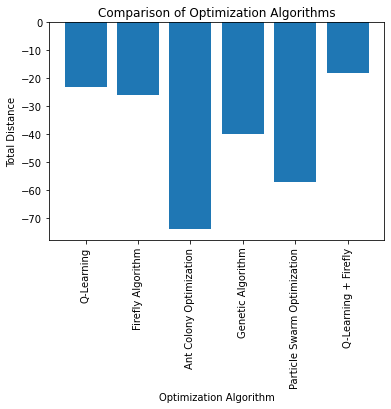

In [16]:
plt.bar(algorithms, distances)
plt.xlabel('Optimization Algorithm')
plt.ylabel('Total Distance')
plt.title('Comparison of Optimization Algorithms')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Find the algorithm with the best solution
best_algorithm = max(results, key=results.get)
print(f'\nBest Algorithm: {best_algorithm}')


Best Algorithm: Q-Learning + Firefly
